<p style="background-color:#3498db;font-family:candaralight;color:#ffffff;font-size:175%;text-align:center;border-radius:10px 10px;">FORD</p>
<p style="background-color:#ffffff;font-family:candaralight;color:#B0B0B0;font-size:150%;text-align:center;border-radius:10px 10px;">DỰ ĐOÁN GIÁ CỔ PHIẾU VỚI PYTHON</p>

<div style="width:100%;text-align: center;"> <img align=middle src="../asset/image/logo-ford.jpg" alt="Heat beating" > </div>




#### Dự án "Dự đoán giá cổ phiếu với python" sử dụng dữ liệu trong vòng 5 năm của các mã cổ phiếu khác nhau trong lĩnh vực sản xuất ô tô trên thể giới.
#### - Ngôn ngữ sử dụng : Python
#### - Mô hình sử dụng trong dự án:
* [Simple Moving Average](#1)
   - [Naive](#1.1)
   - [Window 3](#1.2)
   - [Window 6](#1.3)
* [Simple Exponential Smoothing](#2)
   - [Alpha=0.1](#2.1)
   - [Alpha tối ưu](#2.2)
* [Holt Winter Model](#3)
   - [Hệ số chuẩn](#3.1)
   - [Hệ số tối ưu](#3.2)
   

   <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#3498db; font-family:'Candara Light', sans-serif; color:#ffffff; font-size:175%; text-align:center; border-radius:10px; padding:10px;">Các mục chính</p>


* [1. Data OverView](#1)
    
    - [Import Thư viện](#1.1)
    
    - [Tải dataset](#1.2)
    
    - [Mô tả dữ liệu](#1.3)
        
* [2. Tiền xử lý dữ liệu (Data Preprocessing)](#2)   

    - [Làm sạch dữ liệu (Data cleaning)](#2.1)      
        
    - [Chuyển dạng dữ liệu (Data transformation)](#2.2)

* [3. Thống kê mô tả (Descriptive statistics)](#3)
    
    - [Câu hỏi thống kê](#3.1)

    - [Kết luận](#3.2)

* [4. Phân tích chuỗi thời gian (time series analysis)](#4)
    
    - [Tính mùa vụ, xu hướng và chu kỳ](#4.1)

    - [So sánh với các cổ phiếu cùng ngành (theo giai đoạn)](#4.2)
* [5. Mô hình (Modeling)](#5)
    
    - [Moving Average naive](#5.1)

    - [Moving Average khoảng trượt 3](#5.2)
    
    - [Moving Average khoảng trượt 6](#5.3)

    - [Simple Exponential Smoothing với alpha = 0.1](#5.4)

    - [Simple Exponential Smoothing với alpha tối ưu](#5.5)
    
    - [Holt với hệ số chuẩn](#5.6)

    - [Holt với hệ số tối ưu](#5.7)

    - [Holt Winter với hệ số chuẩn](#5.8)

    - [Holt Winter với hệ số tối ưu](#5.9)

* [6. Đánh giá và so sánh mô hình (Model Evaluation and Comparison)](#6)
    
* [7. Kết luận (Conclusion)](#7)



   <a id='1'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#000000;font-family:candaralight;color:#ffffff;font-size:175%;text-align:center;border-radius:10px 10px;"> DATA OVERVIEW </p>

Ở trong notebook này, ta sẽ tiến hành phân tích mã cổ phiếu của FORD, dữ liệu được lấy trong vòng 5 năm với nền tảng YahooFinance

<a id="1.1"></a>
### Import thư viện cần thiết (Import necessary libraries)

In [2]:
import os
import pandas as pd
import numpy as np
import math
import datetime as dt
from matplotlib import pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import optuna
import yfinance as yf


from sklearn.metrics import mean_squared_error, mean_absolute_error,explained_variance_score, explained_variance_score,r2_score,mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler
from pickle import TRUE
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf

 <a id="1.2"></a>
###  Tải dataset

In [3]:
# Mô tả kiểu dữ liệu của từng cột trong data set
df = pd.read_csv('../dataset/FORD.csv')

 <a id="1.3"></a>
###   Mô tả dữ liệu (Data Description)

In [8]:
# Mô tả kiểu dữ liệu của từng cột trong data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       1259 non-null   object 
 1   open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   low        1259 non-null   float64
 4   close      1259 non-null   float64
 5   adj_close  1259 non-null   float64
 6   volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In [9]:
# Xem 10 dòng đầu tiên của dataset
df.head(10)

,date,open,High,low,close,adj_close,volume
0,2018-12-24,8.01,8.01,7.61,7.63,6.134899,38709500
1,2018-12-26,7.73,7.86,7.41,7.85,6.311790,58810000
2,2018-12-27,7.82,7.85,7.53,7.85,6.311790,49813000
3,2018-12-28,7.83,8.04,7.76,7.81,6.279628,47331700
4,2018-12-31,7.85,7.86,7.50,7.65,6.150980,57816000
5,2019-01-02,7.53,8.02,7.48,7.90,6.351993,47494400
6,2019-01-03,7.97,7.99,7.78,7.78,6.255506,39172400
7,2019-01-04,7.91,8.12,7.85,8.08,6.496720,43039800
8,2019-01-07,8.11,8.37,8.03,8.29,6.665572,40729400
9,2019-01-08,8.42,8.54,8.35,8.37,6.729895,45644000


<a id='2'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#000000;font-family:candaralight;color:#ffffff;font-size:175%;text-align:center;border-radius:10px 10px;"> TIỀN XỬ LÝ DỮ LIỆU (DATA PREPROCESSING) </p>
Với phần này, ta sẽ tiến hành làm sạch (cleaning) và chuyển dạng (transformation) dữ liệu

<a id="2.1"></a>
### Làm sạch dữ liệu (Data cleaning)
    
Kiểm tra dữ liệu thiếu và dự liệu lặp.

In [10]:
# Thay đổi tên cột để dễ thao tác
df= df.rename(columns={'Date':'date','Open':'open','Hight':'hight','Low':'low','Close':'close','Adj Close':'adj_close','Volume':'volume'})
df.head()

,date,open,High,low,close,adj_close,volume
0,2018-12-24,8.01,8.01,7.61,7.63,6.134899,38709500
1,2018-12-26,7.73,7.86,7.41,7.85,6.311790,58810000
2,2018-12-27,7.82,7.85,7.53,7.85,6.311790,49813000
3,2018-12-28,7.83,8.04,7.76,7.81,6.279628,47331700
4,2018-12-31,7.85,7.86,7.50,7.65,6.150980,57816000


In [11]:
# Kiểm tra dữ liệu thiếu
print("Null values", df.isnull().values.sum())
print("NA values:", df.isna().values.any())

Null values 0
NA values: False


In [12]:
# Kiểm tra dữ liệu lặp
df.duplicated().sum()

0

<a id="2.2"></a>
###  Chuyển dạng dữ liệu (Data transformation)
    
Các kiểu dữ liệu cột đã được kiểm tra và kiểu ngày tháng đã được sửa theo từng đối tượng. <br>
Chuyển cột 'date' sang định dạng datetime

In [13]:
# Chuyển cột date sang datetime
df['date'] = pd.to_datetime(df.date)
df.head()

,date,open,High,low,close,adj_close,volume
0,2018-12-24,8.01,8.01,7.61,7.63,6.134899,38709500
1,2018-12-26,7.73,7.86,7.41,7.85,6.311790,58810000
2,2018-12-27,7.82,7.85,7.53,7.85,6.311790,49813000
3,2018-12-28,7.83,8.04,7.76,7.81,6.279628,47331700
4,2018-12-31,7.85,7.86,7.50,7.65,6.150980,57816000


In [14]:
print("Total number of day: ", df.shape[0])
print("Total number of fields: ", df.shape[1])

Total number of day:  1259
Total number of fields:  7


<a id='3'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#000000;font-family:candaralight;color:#ffffff;font-size:175%;text-align:center;border-radius:10px 10px;"> THỐNG KÊ MÔ TẢ (DESCRIPTIVE STATISTICS) </p>

Trong phần này, nhóm sẽ tiến hành đặt các câu hỏi thống kê cho dữ liệu, song song với đó sẽ là các bảng biểu và biểu đồ thích hợp để diễn tả. Cuối cùng là phần kết luận

<a id="3.1"></a>
###  Câu hỏi thống kê
    
Đặt ra các vấn đề thống kê nhằm hiểu rõ hơn về dữ liệu.

<p style="color:#3498db"> Mô tả cơ bản về dữ liệu: Tổng số quan sát, ngày bắt đầu, ngày kết thúc </p>

In [15]:
print("Starting date:", df.loc[0]['date'])
print("Ending date:", df.loc[df.index[-1], 'date'])
print("Total date",df.loc[df.index[-1],'date'] - df.loc[0,'date'])

Starting date: 2018-12-24 00:00:00
Ending date: 2023-12-22 00:00:00
Total date 1824 days 00:00:00


<p style="color:#3498db"> Tổng quan: giá trị cao nhất, giá trị thấp nhất, giá trị trung bình </p>

In [16]:
df.describe()

,date,open,High,low,close,adj_close,volume
count,1259,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,2021-06-24 06:04:51.660047616,11.517204,11.693598,11.332986,11.514702,10.254647,6.497745e+07
min,2018-12-24 00:00:00,4.270000,4.420000,3.960000,4.010000,3.496775,1.188160e+07
25%,2020-03-25 12:00:00,8.940000,9.025000,8.845000,8.945000,7.649812,4.352985e+07
50%,2021-06-24 00:00:00,11.610000,11.780000,11.420000,11.630000,10.590000,5.744020e+07
75%,2022-09-22 12:00:00,13.535000,13.745000,13.290000,13.500000,12.252740,7.725480e+07
max,2023-12-22 00:00:00,24.870001,25.870001,24.370001,25.190001,22.076630,3.116452e+08
std,NaN,3.648314,3.726102,3.572086,3.652749,3.368474,3.362159e+07


Một số quan sát rút ra :

1.Tổng số quan sát là 1259

2.Giá trị cao nhất, thấp nhất của các cột dữ liệu khác nhau đáng kể cho thấy phạm vi giá trị lớn của các biến

3.Độ lệch chuẩn của từng biến khá lớn, cho thấy mức độ biến động cao của dữ liệu

4.Giá trị giao dịch lớn

<p style="color:#3498db"> Kiểm tra sự khác biệt giữa các biến </p> <br>
Theo tháng

In [12]:
# Nhóm dữ liệu theo tháng của các cột open,close,high và low
monthvise = df.groupby(df['date'].dt.strftime('%B'))[['open','close']].mean()
new_order = ['January','February','March','April','May','June','July','August', 'September','October','November','December']
monthvise = monthvise.reindex(new_order,axis=0)
monthvise.head()

,open,close
date,,
January,12.508911,12.538218
February,11.829368,11.832842
March,11.210000,11.172679
April,10.826176,10.792843
May,10.620000,10.627238


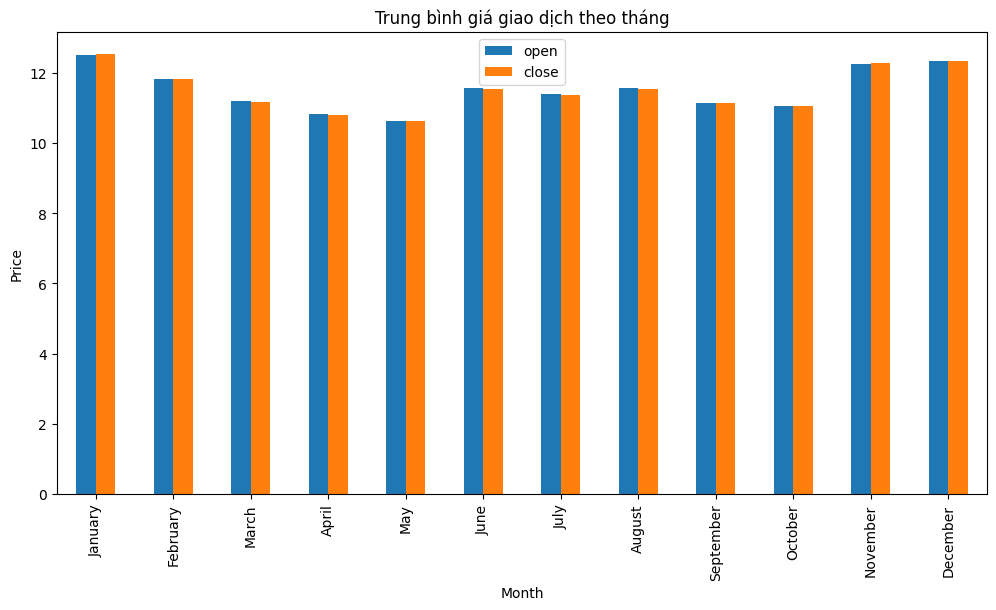

In [13]:
# Vẽ bar-plot mô tả
monthvise.plot(kind = 'bar', figsize=(12,6))
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('Trung bình giá giao dịch theo tháng')
plt.show()

Theo năm

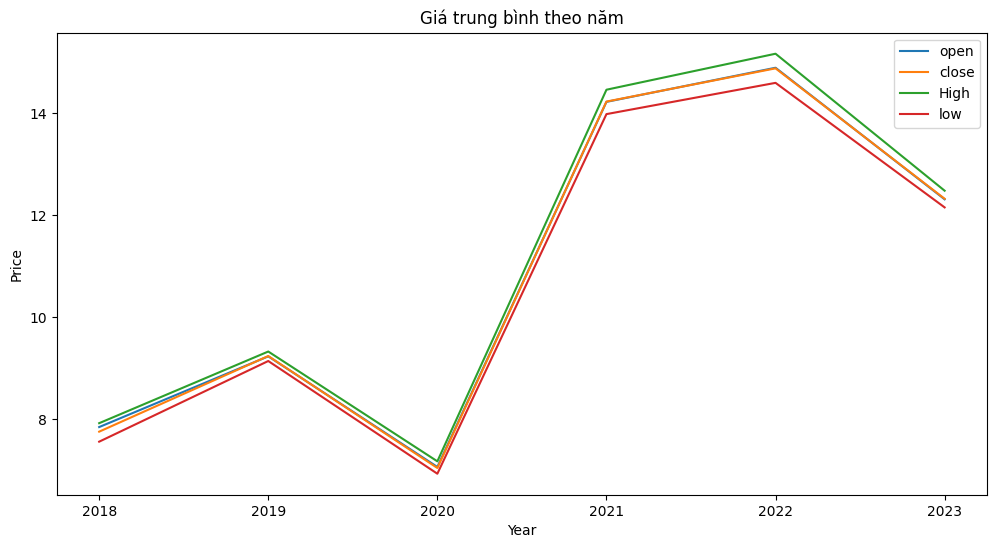

In [14]:
df.groupby(df['date'].dt.year)[['open','close','High','low']].mean().plot(kind='line',figsize=(12,6))
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Giá trung bình theo năm')
plt.show()

Tương quan

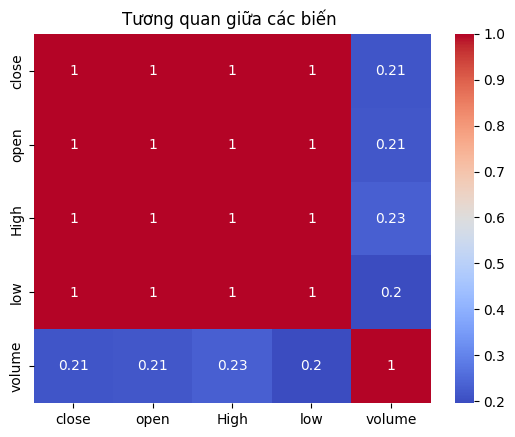

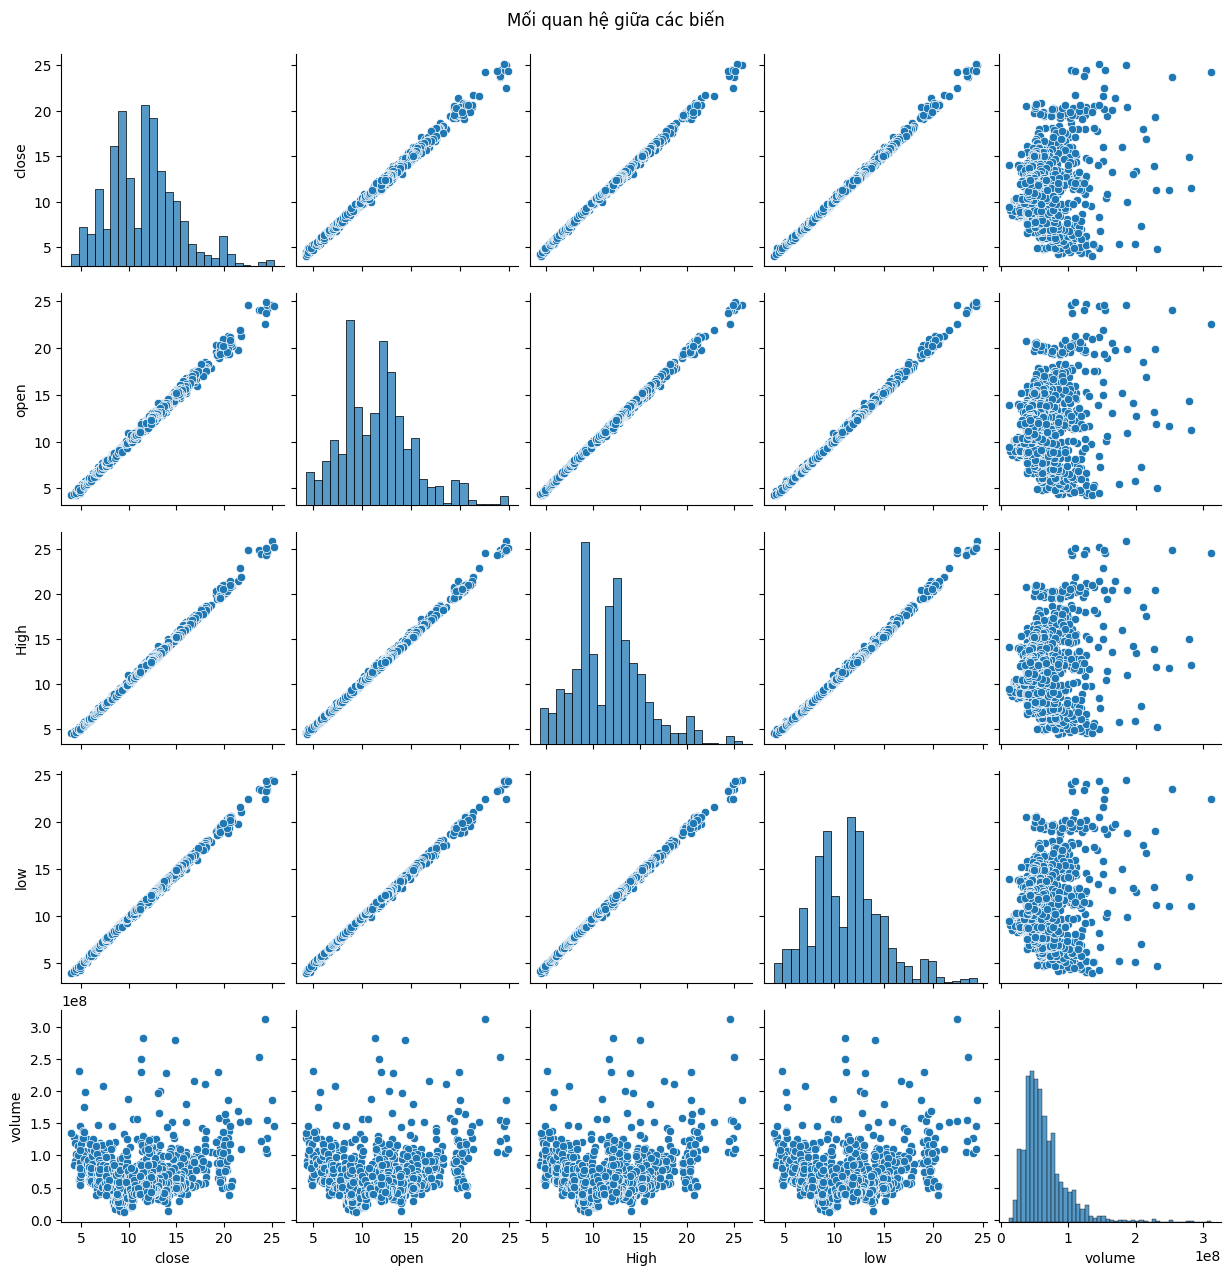

In [15]:
# Vẽ heatmap thể hiện độ tương quan giữa các biến
columns_to_corr = ['close', 'open', 'High', 'low','volume']
corr = df[columns_to_corr].corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Tương quan giữa các biến ')
plt.show()
# Vẽ Pairplot
sns.pairplot(data=df[columns_to_corr])
plt.suptitle('Mối quan hệ giữa các biến', y=1.02)
plt.show()

Nhận xét:

1.Barplot giá trung bình theo tháng:

 + Hiển thị sự phân bố close price và open price theo tháng

 + Giá trị giữa 2 biến không có sự chênh lệch đáng kể

2.Lineplot giá trung bình thay đổi theo năm:

 + Hiển thị 4 biến close, open, high, low theo năm

+ Có sự tương quan thuận cao giữa các biến close, open, high và low, nhưng có sự tương quan nghịch yếu với volume

3.Heatmap và pairplot:

+ Cho thấy mối quan hệ và tính tương quan giữa 5 biến

+ Các biến close, open,high và low có mối quan hệ tuyến tính với nhau.
+ Volume không có sự tương quan chặt chẽ với bất kì biến nào

In [16]:
# Tạo dataframe mới bằng cột close và date
closedf = df[['date','close']]

<p style="color:#3498db"> Kiểm tra phân phối dữ liệu </p>

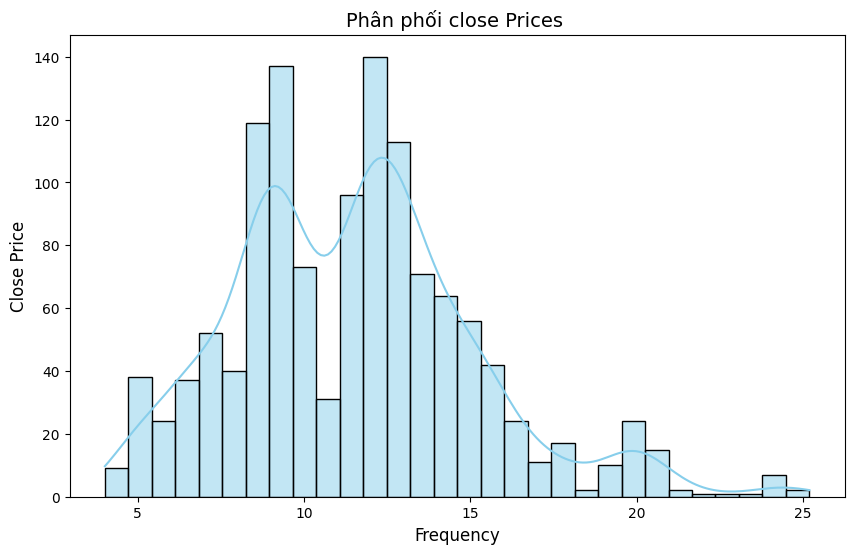

Độ xiên của dữ liệu: 0.6366681740643982


In [17]:
# Vẽ histogram cho cột 'close'
plt.figure(figsize=(10, 6))
sns.histplot(closedf['close'], bins=30, kde=True, color='skyblue')
plt.title('Phân phối close Prices ', fontsize=14)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Close Price', fontsize=12)

# Hiển thị đồ thị histogram
plt.show()

# Đo độ xiên của dữ liệu
skewness = df['close'].skew()
print(f"Độ xiên của dữ liệu: {skewness}")

Nhận xét :

+ Giá cổ phiểu chủ yếu nằm trong khoảng từ 20-140

+ Thông qua Skewness và histogram có thể thấy giá cổ phiếu lệch trái

<p style="color:#3498db"> Giá trung bình cổ phiếu năm 2023 theo tháng và theo quý</p>

In [18]:
# Tạo biến mới chứa dữ liệu 2023
close_stock_2023 = closedf[closedf['date'] > '2023-01-01'].copy()
print("Total date for prediction: ", close_stock_2023.shape[0])
print(close_stock_2023)

Total date for prediction:  246
           date  close
1013 2023-01-03  11.68
1014 2023-01-04  12.01
1015 2023-01-05  12.25
1016 2023-01-06  12.58
1017 2023-01-09  12.69
...         ...    ...
1254 2023-12-18  11.93
1255 2023-12-19  12.02
1256 2023-12-20  11.80
1257 2023-12-21  12.34
1258 2023-12-22  12.35

[246 rows x 2 columns]


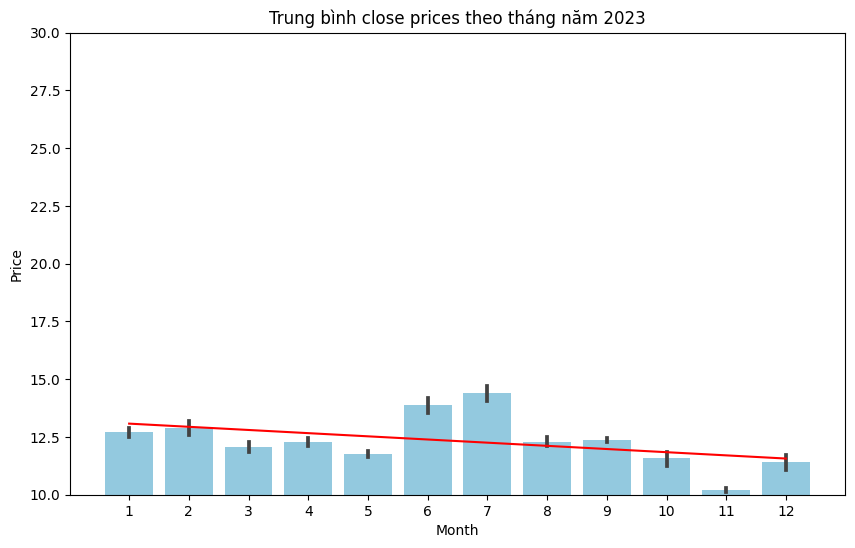

In [19]:
plt.figure(figsize=(10, 6))
# Chỉ rõ trục x và trục y cho sns.barplot
sns.barplot(x=close_stock_2023['date'].dt.month, y=close_stock_2023['close'], color="skyblue")
x_values = np.unique(close_stock_2023['date'].dt.month - 1)
y_values = close_stock_2023.groupby(close_stock_2023['date'].dt.month)['close'].mean()
slope, intercept = np.polyfit(x_values, y_values, 1)
plt.plot(x_values, slope * x_values + intercept, color='red', linestyle='solid')
plt.xlabel('Month')
plt.ylabel('Price')
plt.ylim(10, 30)
plt.title('Trung bình close prices theo tháng năm 2023')
plt.show()


In [20]:
closedf = df[['date','close']].copy()

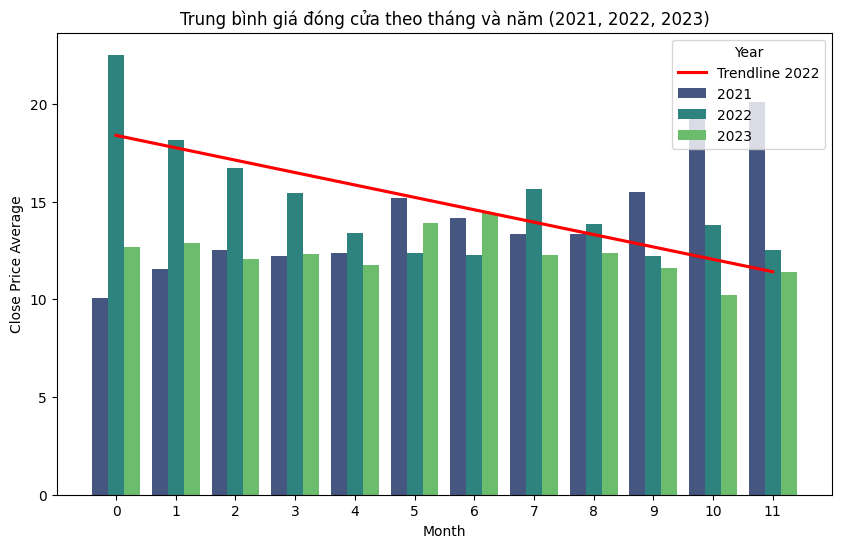

In [21]:
# Tạo biểu đồ so sánh giá đóng cửa trung bình theo tháng giữa các năm
closedf['Year'] = closedf['date'].dt.year
closedf['Month'] = closedf['date'].dt.month -1
years_of_interest = [2021, 2022, 2023]
df_filtered = closedf[closedf['Year'].isin(years_of_interest)]
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Month', y='close', hue='Year', data=df_filtered.groupby(['Month', 'Year'])['close'].mean().reset_index(), palette='viridis')
sns.regplot(x='Month', y='close', data=df_filtered[df_filtered['Year'] == 2022].groupby(['Month'])['close'].mean().reset_index(),
            ci=None, scatter=False, ax=ax, line_kws={'linestyle': '-', 'color': 'red'},label='Trendline 2022')
plt.xlabel('Month')
plt.ylabel('Close Price Average')
plt.title('Trung bình giá đóng cửa theo tháng và năm (2021, 2022, 2023)')
plt.legend(title='Year',loc='upper right')
plt.show()

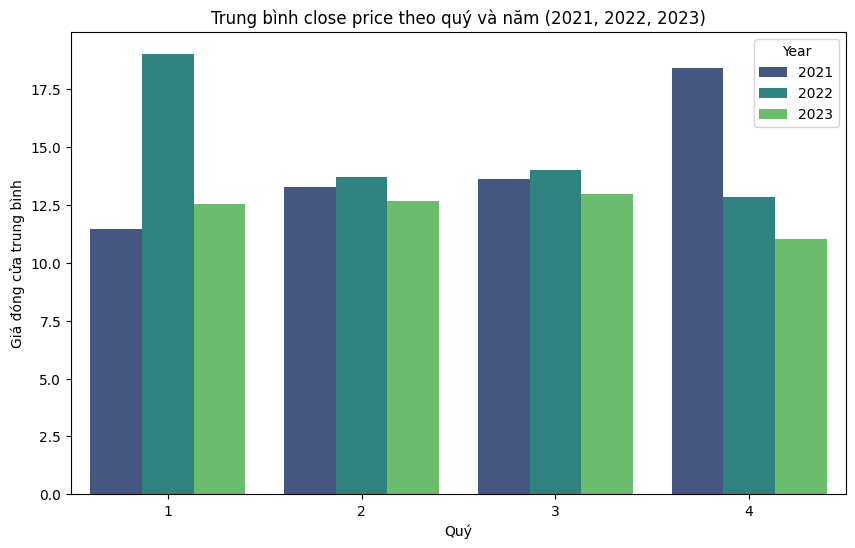

In [22]:
# Tạo biểu đồ so sánh giá đóng cửa trung bình theo quý giữa các năm
closedf['Quarter'] = closedf['date'].dt.quarter
years_of_interest = [2021, 2022, 2023]
df_filtered = closedf[closedf['Year'].isin(years_of_interest)]
plt.figure(figsize=(10, 6))
sns.barplot(x='Quarter', y='close', hue='Year', data=df_filtered.groupby(['Quarter', 'Year'])['close'].mean().reset_index(), palette='viridis')
plt.xlabel('Quý')
plt.ylabel('Giá đóng cửa trung bình')
plt.title('Trung bình close price theo quý và năm (2021, 2022, 2023)')
plt.show()

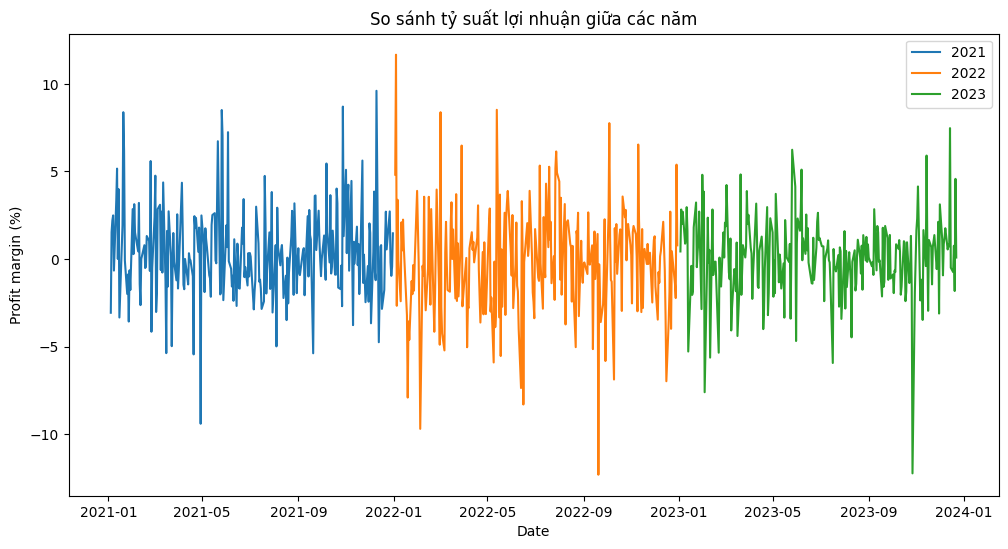

In [23]:
# Tính tỷ suất lợi nhuận dựa trên giá đóng cửa
closedf['Return'] = closedf['close'].pct_change() * 100

plt.figure(figsize=(12, 6))
for year in [2021, 2022, 2023]:
    data_year = closedf[closedf['date'].dt.year == year]
    plt.plot(data_year['date'], data_year['Return'], label=str(year))

plt.title('So sánh tỷ suất lợi nhuận giữa các năm')
plt.xlabel('Date')
plt.ylabel('Profit margin (%)')
plt.legend()
plt.show()

Nhận xét :

+ Với barplot : Năm 2021 đều có xu hướng tăng trưởng vào cuối năm. Năm 2022 và 2023 lại có sự sụt giảm giá cổ phiếu vào cuối năm
+ Với ProfitPlot : Năm 2022 có biên động lợi nhuận cao so với các năm khác

<a id="3.2"></a>
###  Kết luận

+ Các kiểu dữ liệu cột đã được kiểm tra và kiểu ngày tháng đã được sửa theo từng đối tượng.
+ Chuyển cột 'date' sang định dạng datetime

<a id='4'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#000000;font-family:candaralight;color:#ffffff;font-size:175%;text-align:center;border-radius:10px 10px;"> CHUỖI THỜI GIAN (TIME SERIES) </p>

Trong phần này, nhóm sẽ tiến hành xem xét các yếu tổ chuỗi thời gian có trong dữ liệu,song song với đó là việc xem xét sự giống và khác nhau giữa các mã cổ phiếu cùng nhóm ngành ô tô trên thể giới.

<a id="4.1"></a>
###  Các yếu tố của chuỗi thời gian
    
Sử dụng biểu đồ và bảng biểu để thể hiện yếu tố mùa vụ, xu hướng và chu kỳ của cổ phiếu.

In [24]:
closedfcopy = df[['date','close']].copy()

In [25]:
# Đặt cột date làm index
closedfcopy = closedfcopy.set_index('date')

Trung hạn

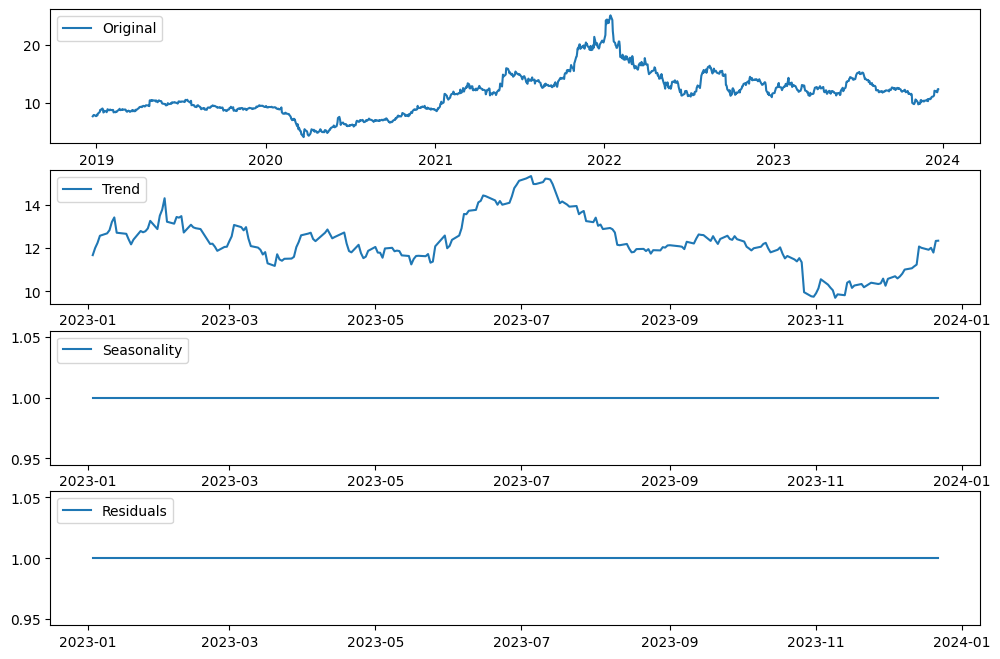

In [26]:
# Vẽ biểu đồ các yếu tố xu hướng năm 2023
result = seasonal_decompose(closedfcopy['close'][closedfcopy.index > '2023-01-01'], model='multiplicative', period=1)

plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(closedfcopy['close'], label='Original')
plt.legend(loc='upper left')

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonality')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residuals')
plt.legend(loc='upper left')
plt.show()

Dài hạn

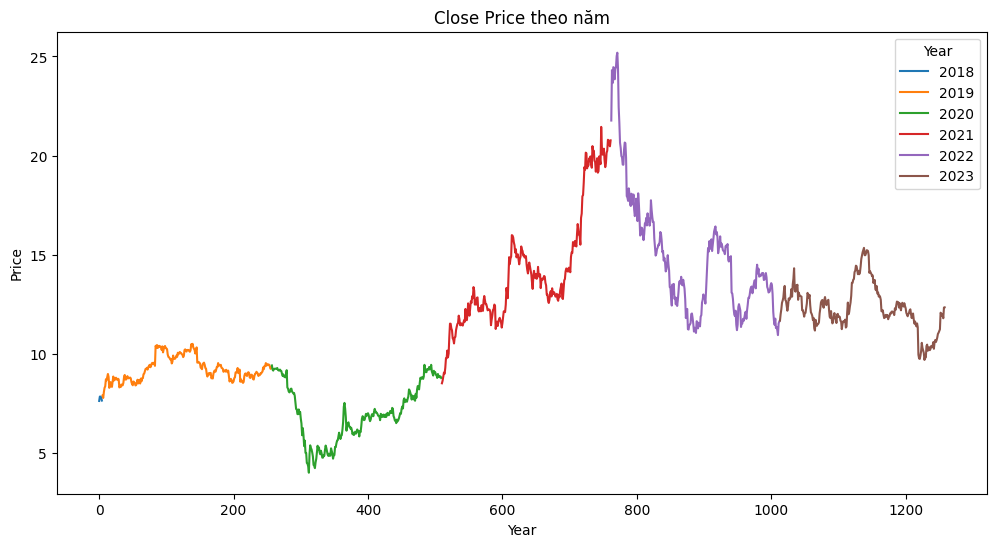

In [27]:
df.groupby(df['date'].dt.year)['close'].plot(figsize=(12,6))
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Close Price theo năm')
plt.legend(title='Year')
plt.show()

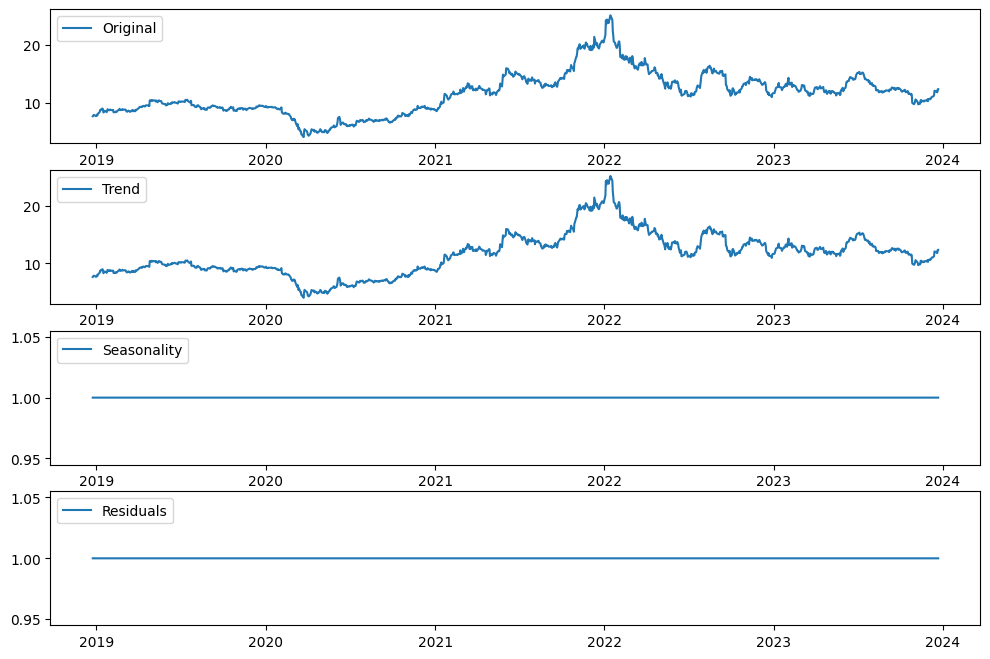

In [28]:
# Vẽ biểu đồ các yếu tố xu hướng qua các năm
result = seasonal_decompose(closedfcopy['close'], model='multiplicative', period=1)

plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(closedfcopy['close'], label='Original')
plt.legend(loc='upper left')

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonality')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residuals')
plt.legend(loc='upper left')

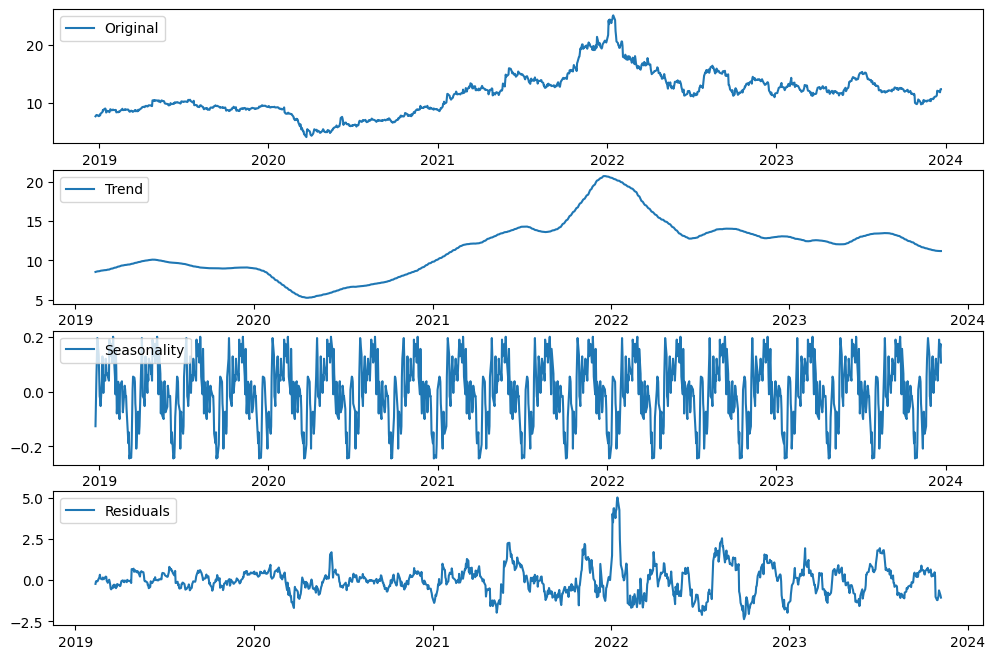

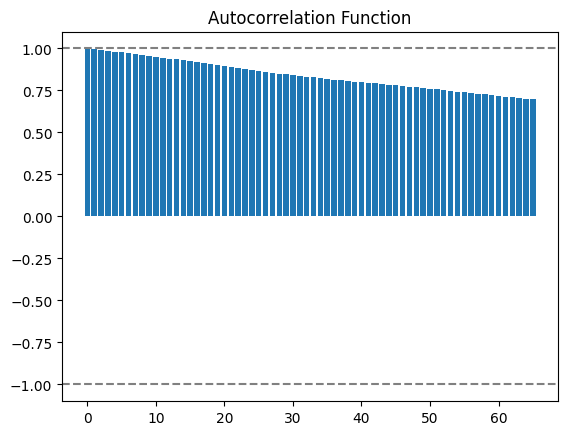

Lags với giá trị tự tương quan vượt ngưỡng 1: []


In [29]:
# Vẽ biểu đồ các yếu tố mùa vụ theo quý qua các năm
result = seasonal_decompose(closedfcopy['close'], model='additive', period=65)

plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(closedfcopy['close'], label='Original')
plt.legend(loc='upper left')

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonality')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residuals')
plt.legend(loc='upper left')
plt.show()

# Tính giá trị tự tương quan
acf_values, conf_int = acf(closedfcopy['close'], nlags=65, alpha=0.05)
plt.bar(range(len(acf_values)), acf_values)
plt.axhline(y=1, linestyle='--', color='gray')  # Vẽ đường ngưỡng 1
plt.axhline(y=-1, linestyle='--', color='gray')  # Vẽ đường ngưỡng -1
plt.title('Autocorrelation Function')
plt.show()

# Tìm các lag khi giá trị tự tương quan vượt ngưỡng 1
lags_exceeding_threshold = np.where(np.abs(acf_values) > 1)[0]
print("Lags với giá trị tự tương quan vượt ngưỡng 1:", lags_exceeding_threshold)

**Nhận xét:**
+ Về trung hạn (2023):
    1. Cho thấy không có yếu tố xu hướng trong close price năm 2023
+ Về dài hạn:
    1. Yếu tố mùa vụ không rõ ràng.
    2. Close Price có xu hướng tăng mạnh vào năm 2022. Ngược lại, Close Price cũng có sự suy giảm vào năm 2023

   <a id='5'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#000000;font-family:candaralight;color:#ffffff;font-size:175%;text-align:center;border-radius:10px 10px;"> TẠO MÔ HÌNH (MODELING) </p>

Ở phần này, nhóm sẽ tiến hành tạo model dựa trên dữ liệu được xử lý trước đó



<a id="5.1"></a>
### Moving Average naïve-step

In [30]:
closedf = df[['date','close']].copy()

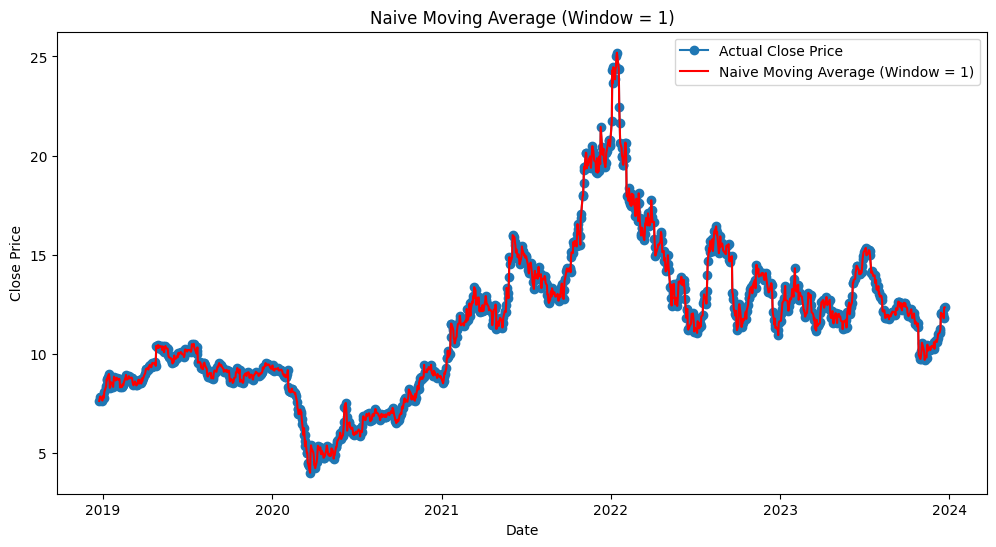

mean_absolute_error: 0.0
mean_absolute_percentage_error 0.0
mean_square_error: 0.0
r2_score: 1.0


In [31]:
window_size = 1

# Tính trung bình động naive
closedf['MA_Naive'] = closedf['close'].rolling(window=window_size).mean()
plt.figure(figsize=(12, 6))
plt.plot(closedf['date'], closedf['close'], label='Actual Close Price', marker='o', linestyle='-')
plt.plot(closedf['date'], closedf['MA_Naive'], label=f'Naive Moving Average (Window = {window_size})', linestyle='-', color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title(f'Naive Moving Average (Window = {window_size})')
plt.legend()
plt.show()
# Các chỉ số đánh giá:
mae_naive = mean_absolute_error(closedf['close'],closedf['MA_Naive'])
mape_naive = mean_absolute_percentage_error(closedf['close'],closedf['MA_Naive'])
mse_naive = mean_squared_error(closedf['close'],closedf['MA_Naive'])
r2_naive = r2_score(closedf['close'],closedf['MA_Naive'])
print("mean_absolute_error:",mae_naive)
print("mean_absolute_percentage_error",mape_naive)
print("mean_square_error:",mse_naive)
print("r2_score:",r2_naive)

<a id="5.2"></a>
### Moving Average 3-step

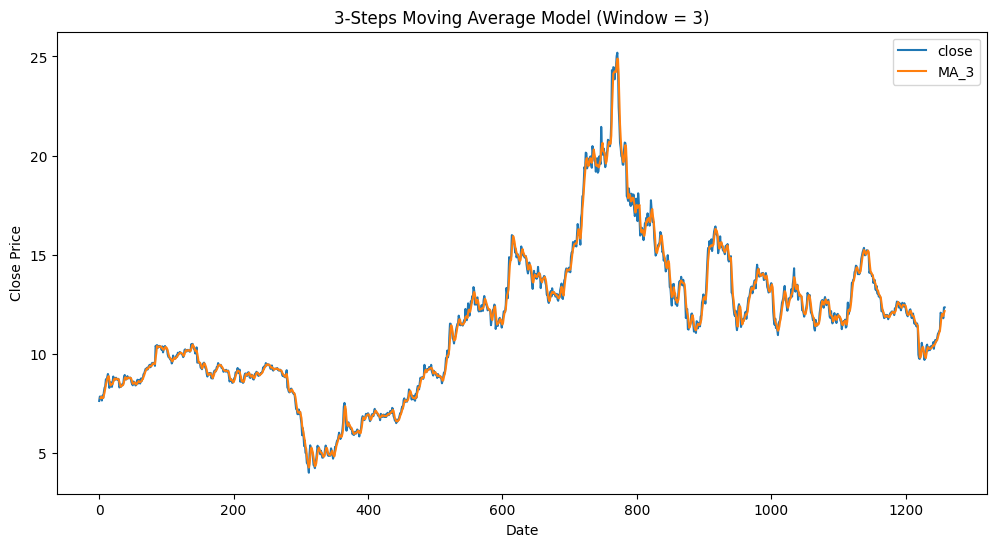

mean_absolute_error: 0.16721559798461946
mean_absolute_percentage_error 0.01452684027198357
mean_square_error: 0.06064017808718608
r2_score: 0.9954510078391234


In [32]:
window_size = 3
closedf['MA_3'] = closedf['close'].rolling(window=window_size).mean()
closedf['close'].plot(figsize=(12,6),legend = TRUE)
closedf['MA_3'].plot(figsize=(12,6),legend = TRUE)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title(f'3-Steps Moving Average Model (Window = {window_size})')
plt.legend()
plt.show()
# Chỉ số đánh giá
mae_3mva = mean_absolute_error(closedf['close'][2:],closedf['MA_3'].dropna())
mape_3mva = mean_absolute_percentage_error(closedf['close'][2:],closedf['MA_3'].dropna())
mse_3mva = mean_squared_error(closedf['close'][2:],closedf['MA_3'].dropna())
r2_3mva = r2_score(closedf['close'][2:],closedf['MA_3'].dropna())
print("mean_absolute_error:",mae_3mva)
print("mean_absolute_percentage_error",mape_3mva)
print("mean_square_error:",mse_3mva)
print("r2_score:",r2_3mva)

<a id="5.3"></a>
### Moving Average 6-step

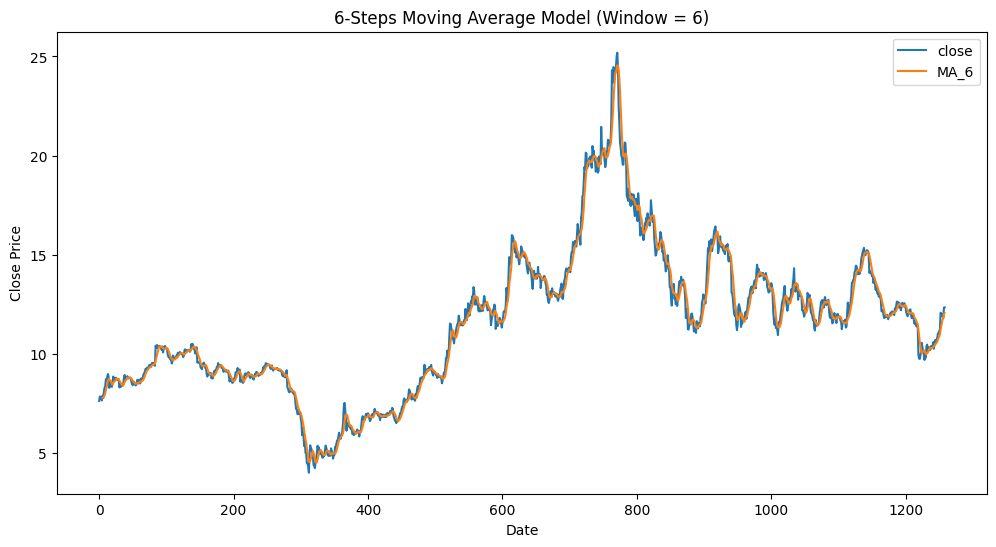

mean_absolute_error: 0.27968235353535353
mean_absolute_percentage_error 0.024423422506167306
mean_square_error: 0.17095807053698872
r2_score: 0.9871735933006767


In [33]:
window_size = 6
closedf['MA_6'] = closedf['close'].rolling(window=window_size).mean()
closedf['close'].plot(figsize=(12,6),legend = TRUE)
closedf['MA_6'].plot(figsize=(12,6),legend = TRUE)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title(f'6-Steps Moving Average Model (Window = {window_size})')
plt.legend()
plt.show()
# Chỉ số đánh giá
mae_6mva = mean_absolute_error(closedf['close'][5:],closedf['MA_6'].dropna())
mape_6mva = mean_absolute_percentage_error(closedf['close'][5:],closedf['MA_6'].dropna())
mse_6mva = mean_squared_error(closedf['close'][5:],closedf['MA_6'].dropna())
r2_6mva = r2_score(closedf['close'][5:],closedf['MA_6'].dropna())
print("mean_absolute_error:",mae_6mva)
print("mean_absolute_percentage_error",mape_6mva)
print("mean_square_error:",mse_6mva)
print("r2_score:",r2_6mva)

<a id="5.4"></a>
### Simple Exponential Smoothing Alpha=0.1

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


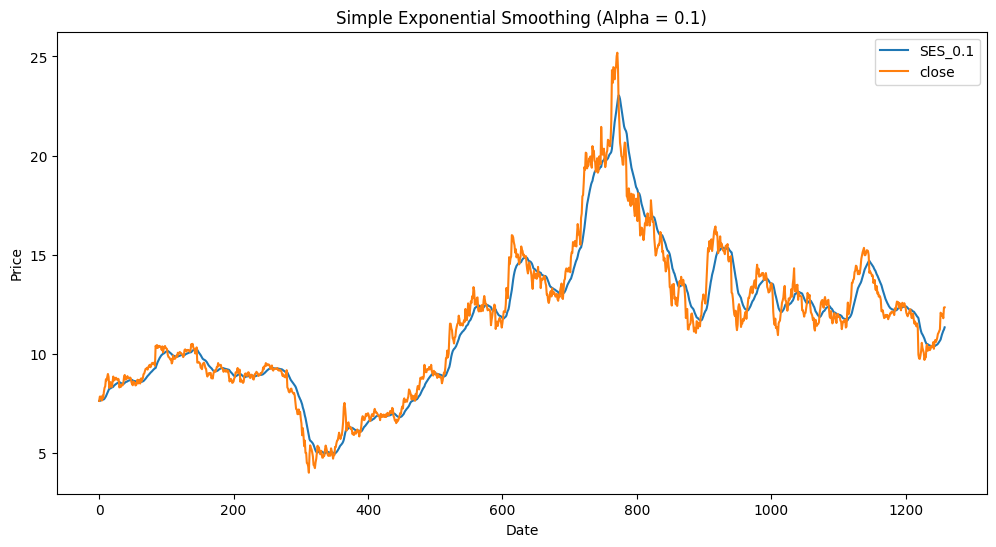

mean_absolute_error: 0.567165880444178
mean_absolute_percentage_error 0.048582497179498564
mean_square_error: 0.6562721449785477
r2_score: 0.9507745846320921


In [34]:
model = SimpleExpSmoothing(closedf['close']).fit(smoothing_level=0.1)
closedf['SES_0.1'] = model.fittedvalues
closedf['SES_0.1'].plot(figsize=(12,6),legend = TRUE)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Simple Exponential Smoothing (Alpha = 0.1)')
closedf['close'].plot(figsize=(12,6),legend = TRUE)
plt.show()

# Chỉ số đánh giá
mae_alpha01 = mean_absolute_error(closedf['close'],closedf['SES_0.1'])
mape_alpha01 = mean_absolute_percentage_error(closedf['close'],closedf['SES_0.1'])
mse_alpha01 = mean_squared_error(closedf['close'],closedf['SES_0.1'])
r2_alpha01 = r2_score(closedf['close'],closedf['SES_0.1'])
print("mean_absolute_error:",mae_alpha01)
print("mean_absolute_percentage_error",mape_alpha01)
print("mean_square_error:",mse_alpha01)
print("r2_score:",r2_alpha01)

<a id="5.5"></a>
### Simple Exponential Smoothing Alpha tối ưu

In [35]:
# Tạo hàm generate
def objective(trial):
    alpha = trial.suggest_float('alpha', 0.01, 0.99)
    model = SimpleExpSmoothing(closedf['close']).fit(smoothing_level=alpha)
    predictions = model.fittedvalues
    MAE = mean_absolute_error(closedf['close'], predictions.dropna())
    return MAE

In [ ]:
# Tìm alpha tối ưu bằng trình tối ưu optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)
best_alpha_optuna = study.best_params['alpha']
mae_best_ses = study.best_value
optimal_model_optuna = SimpleExpSmoothing(closedf['close']).fit(smoothing_level=best_alpha_optuna)
closedf['SES_Optimal_Optuna'] = optimal_model_optuna.fittedvalues

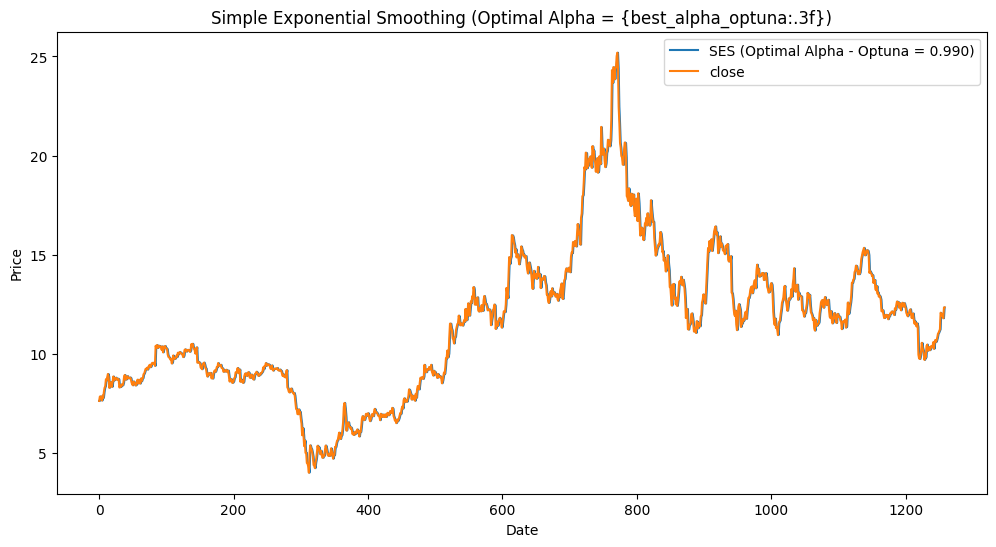

Optimal Alpha: 0.9899984140637559
Best MAE - Optuna: 0.21895911796836343
mean_absolute_error: 0.21895911796836343
mean_absolute_percentage_error 0.019113632965255027
mean_square_error: 0.106473637918555
r2_score: 0.992013665226574


In [39]:
# Xây dựng biểu đồ
closedf['SES_Optimal_Optuna'].plot(figsize=(12,6),legend = TRUE, label=f'SES (Optimal Alpha - Optuna = {best_alpha_optuna:.3f})')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Simple Exponential Smoothing (Optimal Alpha = {best_alpha_optuna:.3f})')
closedf['close'].plot(figsize=(12,6),legend = TRUE)
plt.show()
# In giá trị alpha tối ưu và MAE tương ứng
print("Optimal Alpha:", best_alpha_optuna)
print("Best MAE - Optuna:", mae_best_ses)

mape_sesop = mean_absolute_percentage_error(closedf['close'],closedf['SES_Optimal_Optuna'] )
mse_sesop = mean_squared_error(closedf['close'],closedf['SES_Optimal_Optuna'] )
r2_sesop = r2_score(closedf['close'],closedf['SES_Optimal_Optuna'] )
print("mean_absolute_error:",mae_best_ses)
print("mean_absolute_percentage_error",mape_sesop)
print("mean_square_error:",mse_sesop)
print("r2_score:",r2_sesop)

<a id="5.6"></a>
### Holt Method hệ số chuẩn

In [ ]:
# Mô hình hệ số alpha và beta chuẩn
model = ExponentialSmoothing(closedf['close'], trend='add', damped=True).fit()
closedf['Holt_damped'] = model.fittedvalues

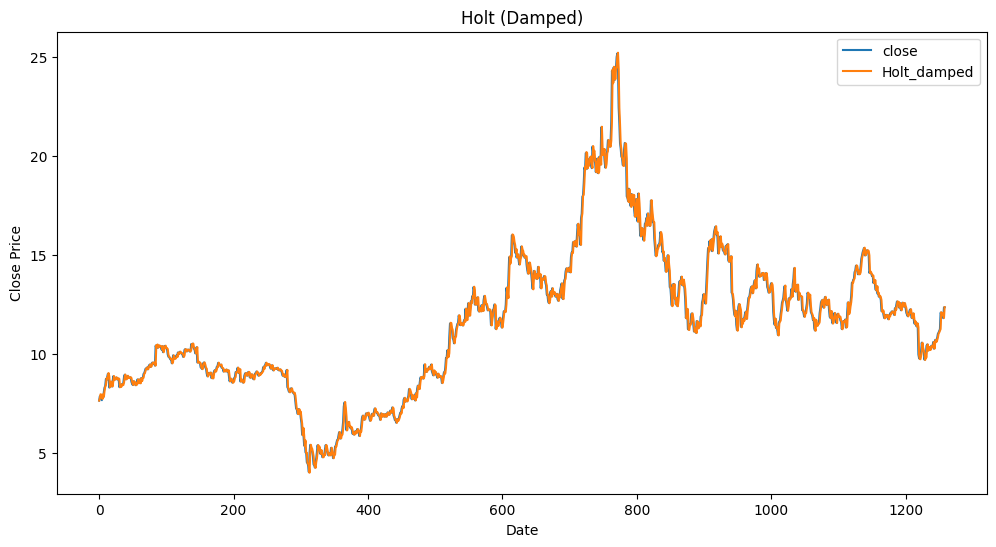

Mean Absolute Error (MAE): 0.21904062384003445
mean_absolute_percentage_error 0.019114521433065423
mean_square_error: 0.10617391772008858
r2_score: 0.992036146527017


In [41]:
# Biểu đồ
closedf['close'].plot(figsize=(12,6),legend = TRUE)
closedf['Holt_damped'] .plot(figsize=(12,6),legend = TRUE)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title(f'Holt (Damped)')
plt.legend()
plt.show()

# Tính chỉ số đánh giá
mae_holt = mean_absolute_error(closedf['close'], closedf['Holt_damped'].dropna())
print("Mean Absolute Error (MAE):", mae_holt)

mape_holt = mean_absolute_percentage_error(closedf['close'],closedf['Holt_damped'] )
mse_holt = mean_squared_error(closedf['close'],closedf['Holt_damped'] )
r2_holt = r2_score(closedf['close'],closedf['Holt_damped'] )
print("mean_absolute_percentage_error",mape_holt)
print("mean_square_error:",mse_holt)
print("r2_score:",r2_holt)

<a id="5.7"></a>
### Holt Method hệ số tối ưu

In [42]:
# Xây dựng mô hình Holt với alpha và beta
def objective_holt(trial):
    alpha = trial.suggest_float('alpha', 0.01, 0.99)
    beta = trial.suggest_float('beta', 0.01, 0.99)
    model = ExponentialSmoothing(df['close'], trend='add', damped=True).fit(smoothing_level=alpha, smoothing_slope=beta)
    predictions = model.fittedvalues
    MAE = mean_absolute_error(df['close'], predictions.dropna())
    return MAE

In [ ]:
# Tìm giá trị alpha và beta tối ưu
study = optuna.create_study(direction='minimize')
study.optimize(objective_holt, n_trials=200)
best_alpha_optuna = study.best_params['alpha']
best_beta_optuna = study.best_params['beta']
mae_holt_op = study.best_value

# Xây dựng mô hình Holt với alpha và beta tối ưu từ Optuna
optimal_model_optuna = ExponentialSmoothing(closedf['close'], trend='add', damped=True).fit(smoothing_level=best_alpha_optuna, smoothing_slope=best_beta_optuna)
closedf['Holt_Optimal_Optuna'] = optimal_model_optuna.fittedvalues

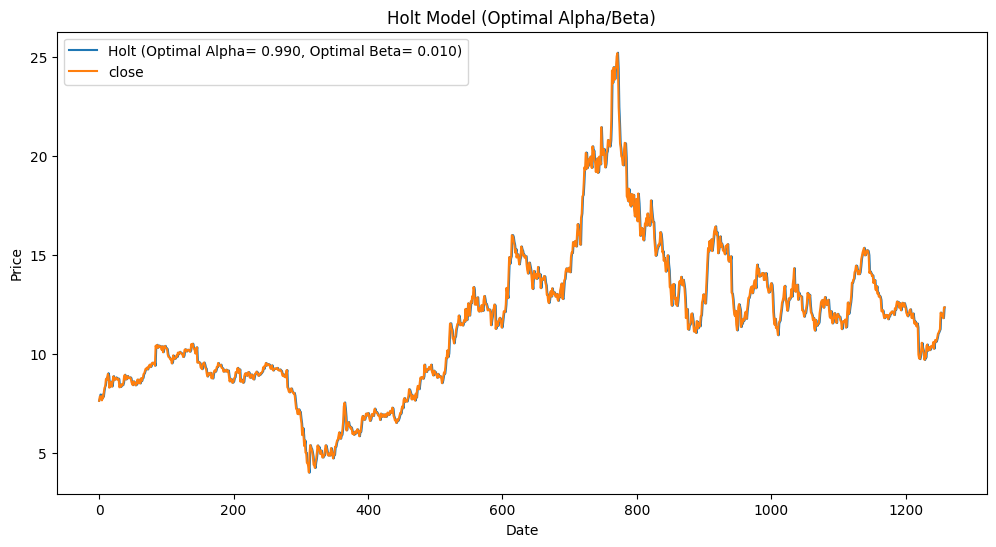

Optimal Alpha: 0.9898438959715662
Optimal Beta: 0.010221078283780003
Best MAE: 0.2189130259759722
mean_absolute_percentage_error 0.019103266673282538
mean_square_error: 0.10626841705102748
r2_score: 0.9920290583565787


In [44]:
# Xây dựng biểu đồ
closedf['Holt_Optimal_Optuna'].plot(figsize=(12,6),legend = TRUE, label=f'Holt (Optimal Alpha= {best_alpha_optuna:.3f}, Optimal Beta= {best_beta_optuna:.3f})')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Holt Model (Optimal Alpha/Beta)')
closedf['close'].plot(figsize=(12,6),legend = TRUE)
plt.show()
# In giá trị alpha và beta tối ưu và MAE tương ứng
print("Optimal Alpha:", best_alpha_optuna)
print("Optimal Beta:", best_beta_optuna)
print("Best MAE:", mae_holt_op)

mape_holt_op = mean_absolute_percentage_error(closedf['close'],closedf['Holt_Optimal_Optuna'] )
mse_holt_op = mean_squared_error(closedf['close'],closedf['Holt_Optimal_Optuna'] )
r2_holt_op = r2_score(closedf['close'],closedf['Holt_Optimal_Optuna'] )
print("mean_absolute_percentage_error",mape_holt_op)
print("mean_square_error:",mse_holt_op)
print("r2_score:",r2_holt_op)

<a id="5.8"></a>
### Holt Winter hệ số chuẩn

In [45]:
# Xây dựng mô hình Holt-Winters với hệ số chuẩn (damping) và mùa vụ (seasonal)
model = ExponentialSmoothing(df['close'], trend='add', seasonal='add', damped=True,seasonal_periods=7).fit()
closedf['Holt_wt'] = model.fittedvalues

<ipython-input-45-63ae257f2865>:2: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  model = ExponentialSmoothing(df['close'], trend='add', seasonal='add', damped=True,seasonal_periods=7).fit()


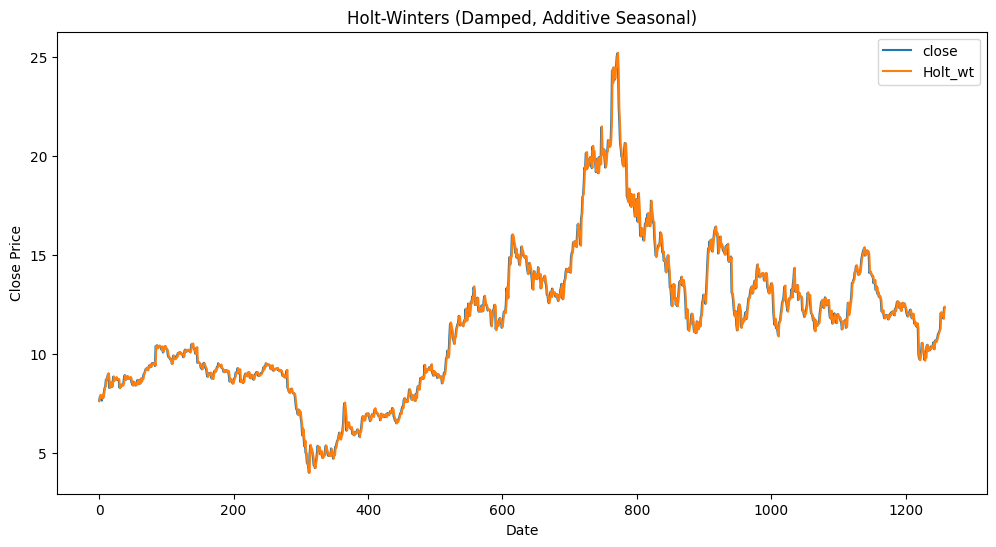

Mean Absolute Error (MAE): 0.21896957180857685
mean_absolute_percentage_error 0.019084171761229146
mean_square_error: 0.10570459350494887
r2_score: 0.9920713494220496


In [46]:
# Vẽ biểu đồ
closedf['close'].plot(figsize=(12,6),legend = TRUE)
closedf['Holt_wt'].plot(figsize=(12,6),legend = TRUE)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title(f'Holt-Winters (Damped, Additive Seasonal)')
plt.legend()
plt.show()


# Tính chỉ số đánh giá
mae_holtwinter = mean_absolute_error(df['close'], closedf['Holt_wt'].dropna())
print("Mean Absolute Error (MAE):", mae_holtwinter)

mape_holtwinter = mean_absolute_percentage_error(closedf['close'],closedf['Holt_wt'] )
mse_holtwinter = mean_squared_error(closedf['close'],closedf['Holt_wt'] )
r2_holtwinter = r2_score(closedf['close'],closedf['Holt_wt'] )
print("mean_absolute_percentage_error",mape_holtwinter)
print("mean_square_error:",mse_holtwinter)
print("r2_score:",r2_holtwinter)

<a id="5.9"></a>
### Holt Winter hệ số tối ưu

In [47]:
# Xây dựng hàm tối ưu
seasonal_periods = 12
def objective_holtwinter(trial):
    alpha = trial.suggest_float('alpha', 0.01, 0.99)
    beta = trial.suggest_float('beta', 0.01, 0.99)
    gamma = trial.suggest_float('gamma', 0, 0.99)
    seasonal = trial.suggest_categorical('seasonal', ['add', 'multiplicative'])

    model = ExponentialSmoothing(df['close'], trend='add', seasonal=seasonal, seasonal_periods=seasonal_periods, damped=True).fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
    predictions = model.fittedvalues
    MAE = mean_absolute_error(df['close'], predictions.dropna())
    return MAE

In [ ]:
# Tìm giá trị tối ưu cho alpha, beta, gamma, và seasonal
study = optuna.create_study(direction='minimize')
study.optimize(objective_holtwinter, n_trials=600)

# Lấy giá trị alpha, beta, gamma, và seasonal tối ưu
best_alpha_optuna = study.best_params['alpha']
best_beta_optuna = study.best_params['beta']
best_gamma_optuna = study.best_params['gamma']
best_seasonal_optuna = study.best_params['seasonal']

# Kiểm tra nếu MAE thấp nhất
mae_holtwinter_op = study.best_value

# Xây dựng mô hình Holt-Winters với hệ số tối ưu từ Optuna
optimal_model_optuna = ExponentialSmoothing(closedf['close'], trend='add', seasonal=best_seasonal_optuna, seasonal_periods=seasonal_periods, damped=True).fit(smoothing_level=best_alpha_optuna, smoothing_slope=best_beta_optuna, smoothing_seasonal=best_gamma_optuna)
closedf['Holt_Winters_Optimal'] = optimal_model_optuna.fittedvalues

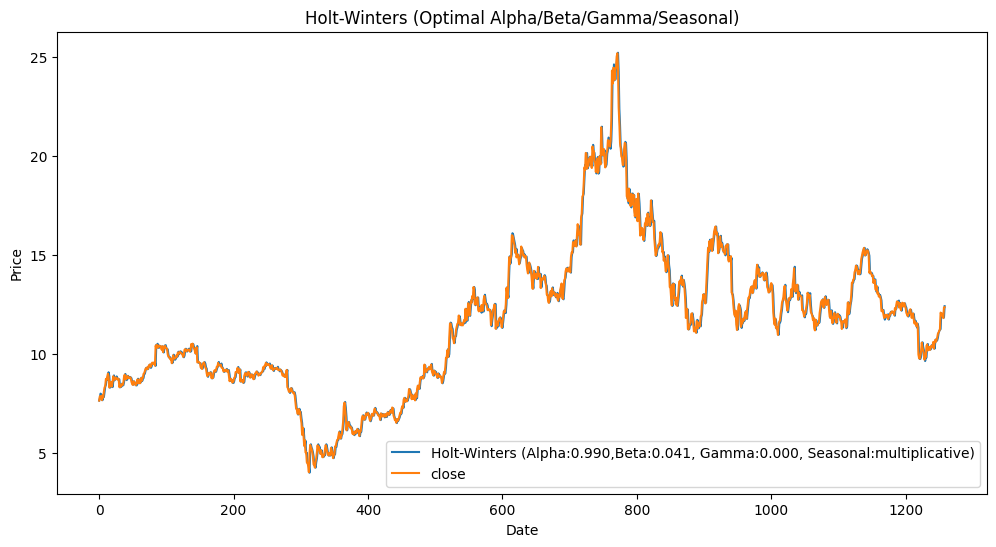

Optimal Alpha: 0.989772680984304
Optimal Beta: 0.04146896099394605
Optimal Gamma: 2.637674941228206e-05
Optimal Seasonal: multiplicative
Best MAE: 0.2185205533250811
mean_absolute_percentage_error 0.019109003539658637
mean_square_error: 0.10506093584783065
r2_score: 0.9921196286546343


In [49]:
# Biểu đồ
closedf['Holt_Winters_Optimal'].plot(figsize=(12,6),legend = TRUE, label=f'Holt-Winters (Alpha:{best_alpha_optuna:.3f},Beta:{best_beta_optuna:.3f}, Gamma:{best_gamma_optuna:.3f}, Seasonal:{best_seasonal_optuna})')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Holt-Winters (Optimal Alpha/Beta/Gamma/Seasonal)')
closedf['close'].plot(figsize=(12,6),legend = TRUE)
plt.show()

# In giá trị alpha, beta, gamma, và seasonal tối ưu và MAE tương ứng
print("Optimal Alpha:", best_alpha_optuna)
print("Optimal Beta:", best_beta_optuna)
print("Optimal Gamma:", best_gamma_optuna)
print("Optimal Seasonal:", best_seasonal_optuna)
print("Best MAE:", mae_holtwinter_op)

mape_holtwinter_op = mean_absolute_percentage_error(closedf['close'],closedf['Holt_Winters_Optimal'] )
mse_holtwinter_op = mean_squared_error(closedf['close'],closedf['Holt_Winters_Optimal'] )
r2_holtwinter_op = r2_score(closedf['close'],closedf['Holt_Winters_Optimal'] )
print("mean_absolute_percentage_error",mape_holtwinter_op)
print("mean_square_error:",mse_holtwinter_op)
print("r2_score:",r2_holtwinter_op)

<a id='6'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#000000;font-family:candaralight;color:#ffffff;font-size:175%;text-align:center;border-radius:10px 10px;"> ĐÁNH GIÁ VÀ SO SÁNH MÔ HÌNH </p>


In [50]:
models = ['Simple SMA_naive','Simple SMA_3','Simple SMA_6', 'Simple SMA_alpha01','Simple SMA_alpha_op','Holt','Holt_op', 'HoltWinter', 'HoltWinter_op']
mae_scores = [mae_naive,mae_3mva,mae_6mva,mae_alpha01,mae_best_ses,mae_holt,mae_holt_op,mae_holtwinter,mae_holtwinter_op]
mse_scores = [mse_naive,mse_3mva,mse_6mva,mse_alpha01,mse_sesop,mse_holt,mse_holt_op,mse_holtwinter,mse_holtwinter_op]
mape_scores = [mape_naive,mape_3mva,mape_6mva,mape_alpha01,mape_sesop,mape_holt,mape_holt_op,mape_holtwinter,mape_holtwinter_op]
r2_scores = [r2_naive,r2_3mva,r2_6mva,r2_alpha01,r2_sesop,r2_holt,r2_holt_op,r2_holtwinter,r2_holtwinter_op]

# Tạo bảng đánh giá
evaluation_df = pd.DataFrame({'Model': models, 'MSE': mse_scores, 'MAE': mae_scores, 'MAPE': mape_scores, 'R2 Score': r2_scores})
evaluation_df.set_index('Model', inplace=True)
print(evaluation_df)

                          MSE       MAE      MAPE  R2 Score
Model                                                      
Simple SMA_naive     0.000000  0.000000  0.000000  1.000000
Simple SMA_3         0.060640  0.167216  0.014527  0.995451
Simple SMA_6         0.170958  0.279682  0.024423  0.987174
Simple SMA_alpha01   0.656272  0.567166  0.048582  0.950775
Simple SMA_alpha_op  0.106474  0.218959  0.019114  0.992014
Holt                 0.106174  0.219041  0.019115  0.992036
Holt_op              0.106268  0.218913  0.019103  0.992029
HoltWinter           0.105705  0.218970  0.019084  0.992071
HoltWinter_op        0.105061  0.218521  0.019109  0.992120
